# Lead Scoring Problem

## Process Flow

1. Understanding Problem Statement
2. Hypothesis Generation
3. Getting the system ready and loading the data
4. Understanding the data
5. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
6. Missing Value and Outlier Treatment
7. Evaluation Metrics for classification problems
8. Model Building Part-I
9. Logistics regression using stratified k-folds cross validation
10. Feature Engineering
11. Model Building Part-II
    Logistic Regression
    Decision Tree
    Random Forest
    XGBoost



## 1. Understanding Problem Statement

A lead is someone who has shown an interest in a particular product and is very likely to buy the product. 

Lead is captured in 2 ways: Direct and Indirect ways. 

Direct ones are captured by the users filling out the form. Indirect ones are captured by the users who have not filled out the form but visited the page. You are provided with the direct leads who filled out the forms.

Lead is captured from the forms. Any user who fills out the form is known as a lead. Identifying the potential leads beforehand will help us to prioritize the leads and pitch our product to these users first. 

Potential leads have a higher chance of buying the product compared to other leads. We can identify the potential leads by assigning every lead a score.


The objective of the problem is to build a smart system to assign a score to the user based on his user journey

## 2. Hypothesis Generation

Hypothesis generation is an important step in building a lead scoring model. It involves formulating initial assumptions or hypotheses about the factors that may contribute to the likelihood of a lead converting into a customer. Here's an example of hypothesis generation for a lead scoring model:

- Hypothesis 1: Form Type Hypothesis
    - Leads generated from specific form types (e.g., demo request, pricing inquiry) are more likely to convert into customers compared to other form types.

- Hypothesis 2: User Experience Hypothesis
    - Leads with a higher level of user experience (e.g., advanced users, power users) are more likely to convert into customers compared to leads with lower levels of user experience.

- Hypothesis 3: UTM Source Hypothesis
    - Leads coming from specific UTM sources (e.g., organic search, referral traffic) have a higher conversion rate compared to leads from other sources.

- Hypothesis 4: Lead Vintage Hypothesis
    - Leads that have been in the system for a longer time (higher lead vintage) are more likely to convert into customers compared to newly acquired leads.

- Hypothesis 5: Engagement Hypothesis
    - Leads that have a higher number of interactions (e.g., page visits, email opens) with the company's website or - marketing materials are more likely to convert into customers.

- Hypothesis 6: Demographic Hypothesis
    - Leads from specific demographic segments (e.g., age group, location, industry) have a higher propensity to convert into customers compared to leads from other segments.

- Hypothesis 7: Lead Rate Hypothesis
    - Leads with a higher lead rate (more frequent lead generation) are more likely to convert into customers compared to leads with a lower lead rate.

Hypotheses can be further validated and refined through data analysis and model training to build an effective lead scoring system.

## 3. Getting the system ready and loading the data

In [1]:
#Loading packages

import pandas as pd
import numpy as np                   # For mathematical calculations
import seaborn as sns                # For Data Visualization
import matplotlib.pyplot as plt      # For plotiing graphs
%matplotlib inline
import warnings                      # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data

data = pd.read_csv('data.csv')

## 4. Understanding the Data

In [3]:
# Features  present in our data

data.columns

Index(['created_at', 'subdomain', 'ext', 'country_code', 'form_type',
       'experience', 'utm_source', 'utm_medium', 'is_signedup', 'vintage',
       'weekday', 'quarter', 'is_weekend', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', '#leads', 'lead_rate', 'form_1',
       'form_6', 'form_7', 'form_2', 'form_3', 'form_4', 'form_5', 'form_8',
       'form_9', 'form_10', 'form_11', 'form_12', 'form_13', 'form_14',
       'form_15', 'buy'],
      dtype='object')

### Feature  Description

- Created_at: date and time at which lead was dropped 
- Subdomain: domain of the email id 
-  Ext: extension of the email id 
-  Country_code: country code of the user
- Form_type: type of the form through which the user has dropped a lead 
-  Experience: experience of the user
- Utm_source: UTM source of the lead
- Utm_medium: UTM medium of the lead 
- Is_signedup: boolean flag indicating if the user has signed up while dropping the lead 
-  vintage: vintage of the user
- DateTime features:
- weekday
-  quarter
- is_weekend
-  is_month_start
-  is_month_end 
- is_quarter_start 
- is_quarter_end 
- #leads: no. of leads dropped in the last 3 months
- lead_rate: no. of leads/time 
- Form_{1-15}: no. of leads dropped through different forms 
- buy: target variable indicating if the user has bought the product in the next 90 days after dropping the lead

In [7]:
data.shape

(60295, 35)

In [4]:
# Data Info- Data Types, Null Values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60295 entries, 0 to 60294
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   created_at        60295 non-null  object 
 1   subdomain         60295 non-null  object 
 2   ext               60295 non-null  object 
 3   country_code      60295 non-null  object 
 4   form_type         60295 non-null  object 
 5   experience        60295 non-null  object 
 6   utm_source        60295 non-null  object 
 7   utm_medium        60295 non-null  object 
 8   is_signedup       60295 non-null  bool   
 9   vintage           60295 non-null  int64  
 10  weekday           60295 non-null  int64  
 11  quarter           60295 non-null  int64  
 12  is_weekend        60295 non-null  int64  
 13  is_month_start    60295 non-null  bool   
 14  is_month_end      60295 non-null  bool   
 15  is_quarter_start  60295 non-null  bool   
 16  is_quarter_end    60295 non-null  bool  

In [5]:
# Data Eyeballing

data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,...,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 7:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 7:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,4,1,0,True,False,True,False,4,4.0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data.duplicated().sum()

0

#### Inference
 NO duplicates present

In [12]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [13]:
numeric_features = data.select_dtypes(include=['int','float']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [14]:
numeric_features

['vintage',
 'weekday',
 'quarter',
 'is_weekend',
 '#leads',
 'lead_rate',
 'form_1',
 'form_6',
 'form_7',
 'form_2',
 'form_3',
 'form_4',
 'form_5',
 'form_8',
 'form_9',
 'form_10',
 'form_11',
 'form_12',
 'form_13',
 'form_14',
 'form_15',
 'buy']

In [15]:
categorical_features

['subdomain',
 'ext',
 'country_code',
 'form_type',
 'experience',
 'utm_source',
 'utm_medium']

In [19]:
for i in data:
    if data[i].dtype == 'object':
        print(f"{i}:", data[i].unique())
        print("-"*100)

subdomain: ['hotmail' 'gmail' 'combined' 'yahoo' 'outlook' 'rediffmail' 'aol' 'live'
 'gamil' 'mail' 'icloud' 'qq' 'fractal']
----------------------------------------------------------------------------------------------------
ext: ['com' 'ac.in' 'combined' 'edu' 'co.uk' 'net' 'in' 'fr' 'co.in' 'edu.in'
 'org' 'ai']
----------------------------------------------------------------------------------------------------
country_code: ['combined' '91' '1' '86' '880' '234' '966' '90' '44' '52' '61' '84' '94'
 '55' '7' '92' '971' '255' '212' '62' '54' '82' '34' '33' '977' '216' '20'
 '57' '66' '27' '65' '49' '260' '251' '254' '63' '233' '60' '31' '353'
 '51' '98' '263' '256' '56' '39' '30' '964' '351' '972' '213' '250' '380'
 '225' '886' '249' '237']
----------------------------------------------------------------------------------------------------
form_type: ['form_1' 'form_2' 'form_3' 'form_4' 'form_5' 'form_6' 'form_7' 'form_8'
 'form_9' 'form_10' 'form_11' 'form_12' 'form_13' 'form_14' 'f

In [20]:
for i in data:
    if data[i].dtype != 'object':
        print(f"{i}:", data[i].unique())
        print("-"*100)

created_at: ['2021-01-01T07:26:01.000000000' '2021-01-01T10:38:59.000000000'
 '2021-01-01T10:46:46.000000000' ... '2022-10-31T23:33:23.000000000'
 '2022-10-31T23:48:47.000000000' '2022-10-31T23:59:40.000000000']
----------------------------------------------------------------------------------------------------
is_signedup: [False  True]
----------------------------------------------------------------------------------------------------
vintage: [  -1    0    7 ... 2664 2757 2443]
----------------------------------------------------------------------------------------------------
weekday: [4 5 6 0 1 2 3]
----------------------------------------------------------------------------------------------------
quarter: [1 2 3 4]
----------------------------------------------------------------------------------------------------
is_weekend: [0 1]
----------------------------------------------------------------------------------------------------
is_month_start: [ True False]
------------------

## Data Cleaning & Preprocessing

In [22]:
negative_vaules_in_columns = [col for col in numeric_features if (data[col] < 0).any()]
print(negative_vaules_in_columns)

['vintage']


In [24]:
data['vintage'].value_counts(normalize=True)

-1       0.391774
 0       0.007215
 1       0.004412
 2       0.003483
 5       0.003367
 3       0.003334
 6       0.003251
 4       0.003184
 7       0.002687
 24      0.002670
 35      0.002604
 11      0.002521
 27      0.002504
 8       0.002471
 13      0.002471
 29      0.002438
 33      0.002372
 26      0.002372
 18      0.002339
 19      0.002339
 42      0.002339
 41      0.002322
 22      0.002289
 31      0.002289
 9       0.002272
 25      0.002256
 36      0.002256
 23      0.002222
 16      0.002206
 37      0.002206
 14      0.002173
 17      0.002139
 20      0.002139
 55      0.002123
 34      0.002123
 21      0.002123
 48      0.002106
 12      0.002106
 30      0.002090
 47      0.002090
 49      0.002090
 15      0.002090
 44      0.002090
 46      0.002073
 50      0.002073
 38      0.002073
 39      0.002040
 32      0.002040
 10      0.002023
 43      0.001990
 40      0.001990
 45      0.001957
 52      0.001907
 51      0.001907
 56      0.001891
 59      0

In [25]:
data.drop('vintage',axis=1,inplace=True)

In [26]:
data['country_code'].unique()

array(['combined', '91', '1', '86', '880', '234', '966', '90', '44', '52',
       '61', '84', '94', '55', '7', '92', '971', '255', '212', '62', '54',
       '82', '34', '33', '977', '216', '20', '57', '66', '27', '65', '49',
       '260', '251', '254', '63', '233', '60', '31', '353', '51', '98',
       '263', '256', '56', '39', '30', '964', '351', '972', '213', '250',
       '380', '225', '886', '249', '237'], dtype=object)

In [27]:
data['country_code'].value_counts(normalize=True)

91          0.528584
1           0.102280
234         0.054300
combined    0.039439
92          0.025342
254         0.017282
44          0.016635
55          0.014031
251         0.011129
880         0.011013
27          0.010349
233         0.009752
20          0.009520
62          0.009454
98          0.009188
61          0.006269
971         0.006136
49          0.005937
90          0.005772
977         0.005656
33          0.005423
84          0.005158
212         0.005058
94          0.004412
52          0.004312
966         0.004146
263         0.003997
57          0.003698
60          0.003616
86          0.003533
216         0.003417
65          0.003383
7           0.003383
213         0.003284
256         0.002952
255         0.002836
34          0.002687
63          0.002637
39          0.002355
54          0.002305
66          0.002256
82          0.002189
237         0.002073
51          0.002057
225         0.001924
353         0.001891
964         0.001874
260         0

In [28]:
data = data[data['country_code'] != 'combined']

In [29]:
data['country_code'] = data['country_code'].astype(int)

In [30]:
data.shape

(57917, 34)

In [31]:
data['subdomain'].unique()

array(['gmail', 'combined', 'yahoo', 'hotmail', 'outlook', 'rediffmail',
       'aol', 'live', 'gamil', 'mail', 'icloud', 'qq', 'fractal'],
      dtype=object)

In [32]:
data['subdomain'] = data['subdomain'].replace('gamil','gmail')

In [33]:
data['subdomain'] = data['subdomain'].replace('combined',np.nan)

In [34]:
data['subdomain'].isna().sum()

5005

In [35]:
data.dropna(axis=0,inplace=True)

In [36]:
data.shape

(52912, 34)

In [37]:
data['ext'].unique()

array(['com', 'co.uk', 'co.in', 'combined', 'in', 'fr', 'ai', 'net'],
      dtype=object)

In [38]:
data['ext'] = data['ext'].replace(['combined'],np.nan)

In [39]:
data['ext'].isna().sum()

349

In [40]:
data.dropna(axis=0,inplace=True)

In [41]:
data.shape

(52563, 34)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52563 entries, 1 to 60294
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        52563 non-null  datetime64[ns]
 1   subdomain         52563 non-null  object        
 2   ext               52563 non-null  object        
 3   country_code      52563 non-null  int32         
 4   form_type         52563 non-null  object        
 5   experience        52563 non-null  object        
 6   utm_source        52563 non-null  object        
 7   utm_medium        52563 non-null  object        
 8   is_signedup       52563 non-null  bool          
 9   weekday           52563 non-null  int64         
 10  quarter           52563 non-null  int64         
 11  is_weekend        52563 non-null  int64         
 12  is_month_start    52563 non-null  bool          
 13  is_month_end      52563 non-null  bool          
 14  is_quarter_start  5256

## Outlier Treatment

In [44]:
numeric_features

['vintage',
 'weekday',
 'quarter',
 'is_weekend',
 '#leads',
 'lead_rate',
 'form_1',
 'form_6',
 'form_7',
 'form_2',
 'form_3',
 'form_4',
 'form_5',
 'form_8',
 'form_9',
 'form_10',
 'form_11',
 'form_12',
 'form_13',
 'form_14',
 'form_15',
 'buy']

In [45]:
numeric_features = numeric_features[1:]
numeric_features

['weekday',
 'quarter',
 'is_weekend',
 '#leads',
 'lead_rate',
 'form_1',
 'form_6',
 'form_7',
 'form_2',
 'form_3',
 'form_4',
 'form_5',
 'form_8',
 'form_9',
 'form_10',
 'form_11',
 'form_12',
 'form_13',
 'form_14',
 'form_15',
 'buy']

In [46]:
outlier_features = [col for col in numeric_features if data[col].nunique()>20]

In [47]:
outlier_features

['#leads', 'lead_rate']

In [49]:
from scipy.stats import skew

In [51]:
# Creating an empty DataFrame to store the skewness values for each feature

skew_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])
# Looping through each feature and calculating the skewness coefficient

for col in outlier_features:
    skewness = skew(data[col])
    skew_df = skew_df.append({'Feature Name': col, 'Skewness': skewness}, ignore_index=True)

print(skew_df)

  Feature Name  Skewness
0       #leads  4.423727
1    lead_rate  1.815345


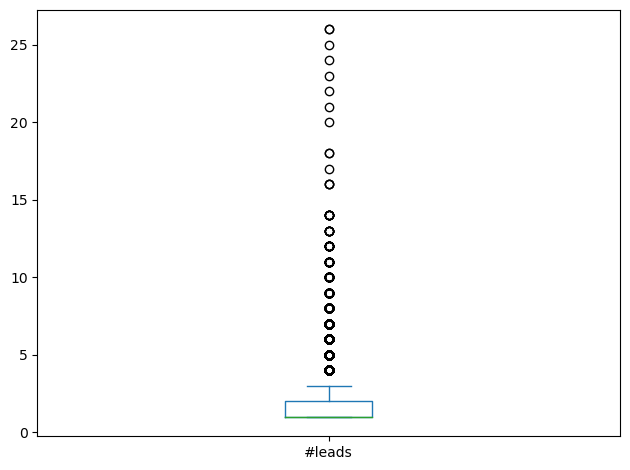

Feature name : #leads  
 Upper limit : 3.5  
 Lower limit : 0.5
----------------------------------------------------------------------------------------------------


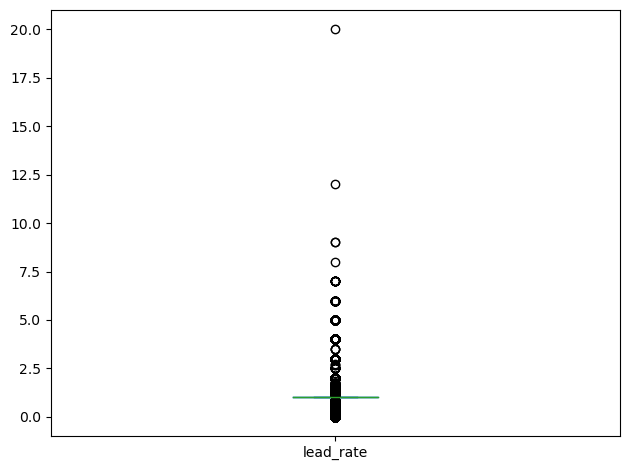

Feature name : lead_rate  
 Upper limit : 2.5  
 Lower limit : -0.5
----------------------------------------------------------------------------------------------------


In [55]:
# So, here following the process of plotting box plot & fetching upper & lower limits of the numerical features

# contained in a newly create variable above and we will do that through a loop to do all at once.
for col in outlier_features:
    data[col].plot.box()
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    iqr = q3 - q1
    ul = (q3) + 1.5*(q1)
    ll = (q3) - 1.5*(q1)
    plt.tight_layout()
    plt.show()
    print('Feature name : {}  \n Upper limit : {}  \n Lower limit : {}'.format(col,ul,ll))
    print('-'*100)

In [57]:
data = data.loc[(data['lead_rate']<=2.5) & (data['lead_rate']>=0.0) & (data['#leads']<=3.5) & (data['#leads']>=0.5)]

In [59]:
data.shape

(48286, 34)

In [60]:
data = data.reset_index(drop=True)

In [62]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 15:23:25,gmail,com,91,form_5,Fresher,source_1,medium_1,False,4,1,0,True,False,True,False,2,2.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,2021-01-01 17:13:25,gmail,com,86,form_6,Fresher,source_3,medium_4,False,4,1,0,True,False,True,False,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        48286 non-null  datetime64[ns]
 1   subdomain         48286 non-null  object        
 2   ext               48286 non-null  object        
 3   country_code      48286 non-null  int32         
 4   form_type         48286 non-null  object        
 5   experience        48286 non-null  object        
 6   utm_source        48286 non-null  object        
 7   utm_medium        48286 non-null  object        
 8   is_signedup       48286 non-null  bool          
 9   weekday           48286 non-null  int64         
 10  quarter           48286 non-null  int64         
 11  is_weekend        48286 non-null  int64         
 12  is_month_start    48286 non-null  bool          
 13  is_month_end      48286 non-null  bool          
 14  is_quarter_start  4828

## Feature Engineering

In [65]:
data['created_at'].min(),data['created_at'].max()

(Timestamp('2021-01-01 10:38:59'), Timestamp('2022-10-31 23:59:40'))

In [69]:
import datetime
from datetime import date

In [73]:
ref_date = date(2022,11,1)
ref_date

datetime.date(2022, 11, 1)

In [78]:
data['vintage'] = (ref_date - data["created_at"].dt.date).dt.days

In [79]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,vintage
0,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,669
1,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,669
2,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669
3,2021-01-01 15:23:25,gmail,com,91,form_5,Fresher,source_1,medium_1,False,4,1,0,True,False,True,False,2,2.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,669
4,2021-01-01 17:13:25,gmail,com,86,form_6,Fresher,source_3,medium_4,False,4,1,0,True,False,True,False,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669


In [80]:
data['Created_at_Year'] = data['created_at'].dt.year
data['Created_at_Month'] = data['created_at'].dt.month
data['Created_at_Date'] = data['created_at'].dt.day
data['Created_at_Time'] = data['created_at'].dt.time

In [81]:
data['Created_at_Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [82]:
month_names = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',\
               10:'October',11:'November',12:'December'}

data['Created_at_Month'] = data['Created_at_Month'].map(month_names)

In [83]:
data['weekday'].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

In [84]:
week_names = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

data['weekday'] = data['weekday'].map(week_names)

In [85]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,vintage,Created_at_Year,Created_at_Month,Created_at_Date,Created_at_Time
0,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,Friday,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,10:38:59
1,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,Friday,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,11:51:01
2,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,Friday,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,13:21:47
3,2021-01-01 15:23:25,gmail,com,91,form_5,Fresher,source_1,medium_1,False,Friday,1,0,True,False,True,False,2,2.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,669,2021,January,1,15:23:25
4,2021-01-01 17:13:25,gmail,com,86,form_6,Fresher,source_3,medium_4,False,Friday,1,0,True,False,True,False,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,17:13:25


In [86]:
data.drop('form_type',axis=1,inplace=True)

In [87]:
data.drop('created_at',axis=1,inplace=True)

In [88]:
data['Created_at_Year'] = pd.Categorical(data['Created_at_Year'],categories=[2021,2022], ordered=True)

data['Created_at_Month'] = pd.Categorical(data['Created_at_Month'],categories=['January','February','March','April','May',\
                                                                               'June','July','August','September','October',\
                                                                               'November','December'], ordered=True)

data['quarter'] = pd.Categorical(data['quarter'],categories=[1,2,3,4], ordered=True)

data['weekday'] = pd.Categorical(data['weekday'],categories=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday',\
                                                             'Saturday','Sunday'], ordered=True)

In [89]:
order_update = ['Created_at_Year','Created_at_Month','Created_at_Date','Created_at_Time','quarter','weekday',\
                'is_weekend','is_month_start','is_month_end','is_quarter_start','is_quarter_end','experience',\
                'is_signedup','country_code','utm_source','utm_medium','subdomain','ext','Lead_created_days_ago',\
                '#leads','lead_rate','form_1','form_2','form_3','form_4','form_5','form_6','form_7','form_8',\
                'form_9','form_10','form_11','form_12','form_13','form_14','form_15','buy']

In [90]:
data = data.reindex(columns=order_update)

data.head()

,Created_at_Year,Created_at_Month,Created_at_Date,Created_at_Time,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,experience,is_signedup,country_code,utm_source,utm_medium,subdomain,ext,Lead_created_days_ago,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021,January,1,10:38:59,1,Friday,0,True,False,True,False,Fresher,True,91,source_1,medium_1,gmail,com,NaN,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021,January,1,11:51:01,1,Friday,0,True,False,True,False,Fresher,False,91,source_2,medium_3,gmail,com,NaN,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021,January,1,13:21:47,1,Friday,0,True,False,True,False,Fresher,True,1,source_1,medium_1,gmail,com,NaN,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021,January,1,15:23:25,1,Friday,0,True,False,True,False,Fresher,False,91,source_1,medium_1,gmail,com,NaN,2,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2021,January,1,17:13:25,1,Friday,0,True,False,True,False,Fresher,False,86,source_3,medium_4,gmail,com,NaN,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Created_at_Year        48286 non-null  category
 1   Created_at_Month       48286 non-null  category
 2   Created_at_Date        48286 non-null  int64   
 3   Created_at_Time        48286 non-null  object  
 4   quarter                48286 non-null  category
 5   weekday                48286 non-null  category
 6   is_weekend             48286 non-null  int64   
 7   is_month_start         48286 non-null  bool    
 8   is_month_end           48286 non-null  bool    
 9   is_quarter_start       48286 non-null  bool    
 10  is_quarter_end         48286 non-null  bool    
 11  experience             48286 non-null  object  
 12  is_signedup            48286 non-null  bool    
 13  country_code           48286 non-null  int32   
 14  utm_source             48286 non-null 

## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features, we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

#### Target variable (buy)

In [6]:
data['buy'].value_counts(normalize=True)

0    0.983597
1    0.016403
Name: buy, dtype: float64

<AxesSubplot:>

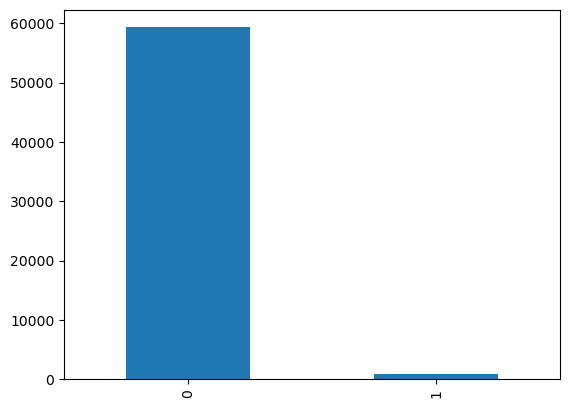

In [16]:
data['buy'].value_counts().plot.bar()

##### Inference
**98.3597%** have not bought any product i.e. **Only 1.64%** leads are successful.

### Problem of Data Imbalance

#### Categorical Variable(Independent)

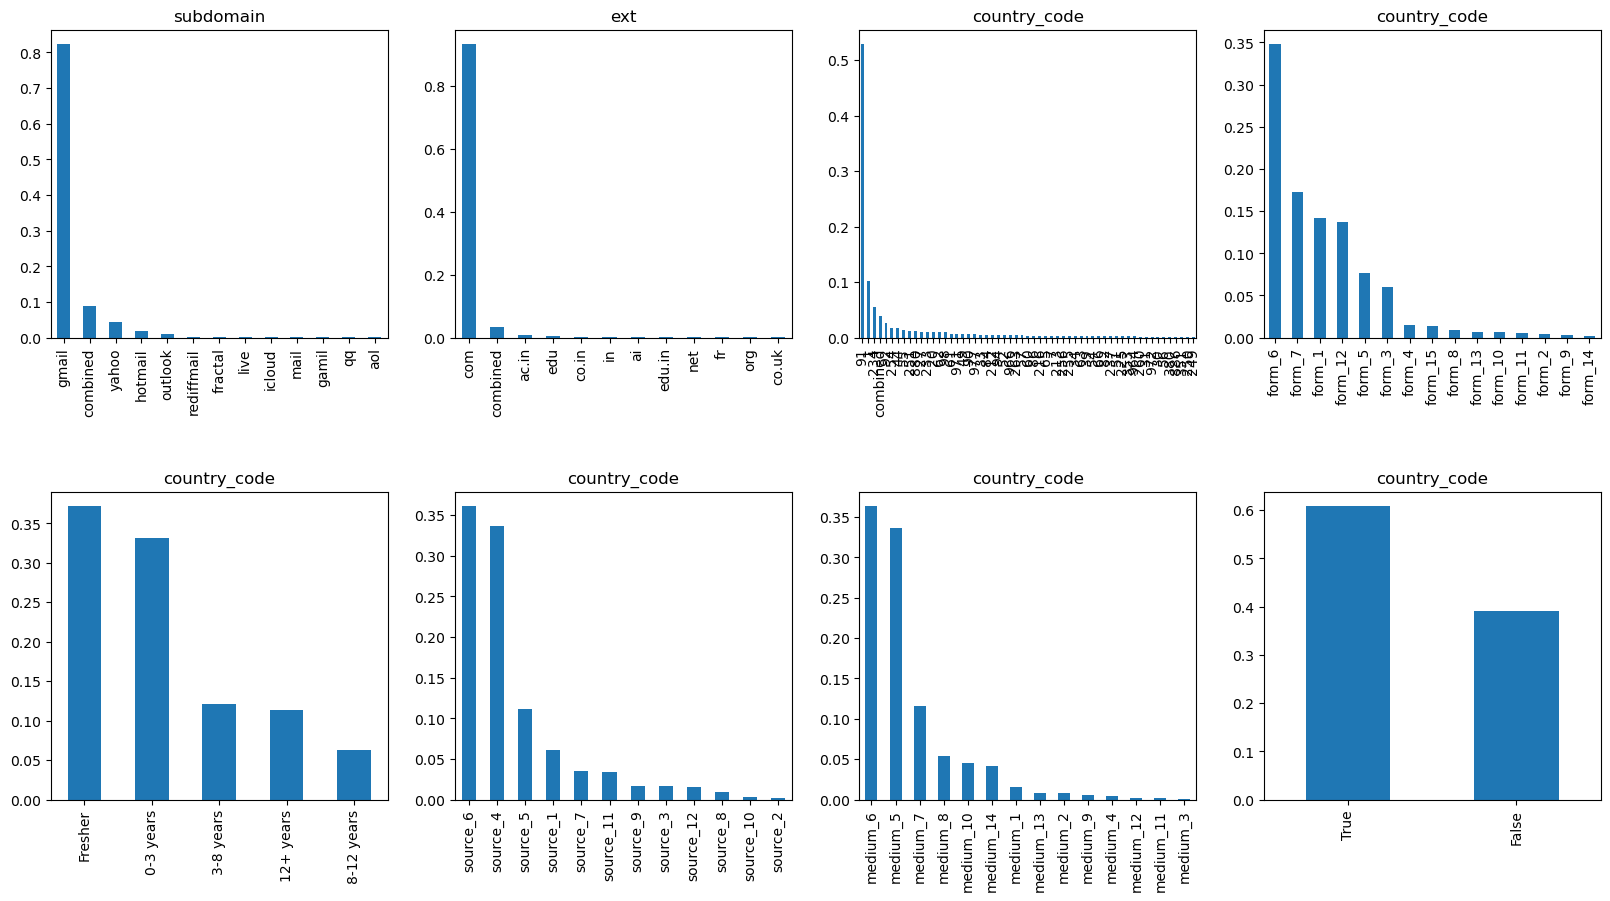

In [31]:
plt.figure(1)
plt.subplot(241)
data['subdomain'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='subdomain')
plt.subplot(242)
data['ext'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='ext')
plt.subplot(243)
data['country_code'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='country_code')
plt.subplot(244)
data['form_type'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='form_type')
plt.subplot(245)
data['experience'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='experience')
plt.subplot(246)
data['utm_source'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='utm_source')
plt.subplot(247)
data['utm_medium'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='utm_medium')
plt.subplot(248)
data['is_signedup'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='is_signedup')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

##### Inference

- **~ 82%** are  gmail users. Also, there might be typo error in gamil
- **~ 93%** are .com users
- **~ 51%** are from country_code 91 (India) and **~ 10%** from country code 1(USA)
- **~ 34%** users from form_6, **~ 17%** from form_7, **~ 14%** from form_, **~ 12%** from form_12, **~ 7%** from form_5 and **~ 6%** from form_3
- **~ 37%** users are Fresher, **~ 33%** are 0-3 years experience, **~ 12%** are 3-8 years experience and **~ 11%** are 12+ years experience
- **~ 36%** users are from source_6, **~ 33%** users are from source_4 and **~ 11%** users are from source_5 
- **~ 36%** users are from medium_6, **~ 33%** users are from medium_5 and **~ 11%** users are from medium_7
- **~ 60%** users are signedup users.

#### Numerical Variable(Independent)

In [39]:
data['vintage'].value_counts(normalize=True)

-1       0.391774
 0       0.007215
 1       0.004412
 2       0.003483
 5       0.003367
           ...   
 2119    0.000017
 2510    0.000017
 2508    0.000017
 2351    0.000017
 2443    0.000017
Name: vintage, Length: 2358, dtype: float64

##### Inference
**-1** is not a feasible value here. It accounts for **39%**

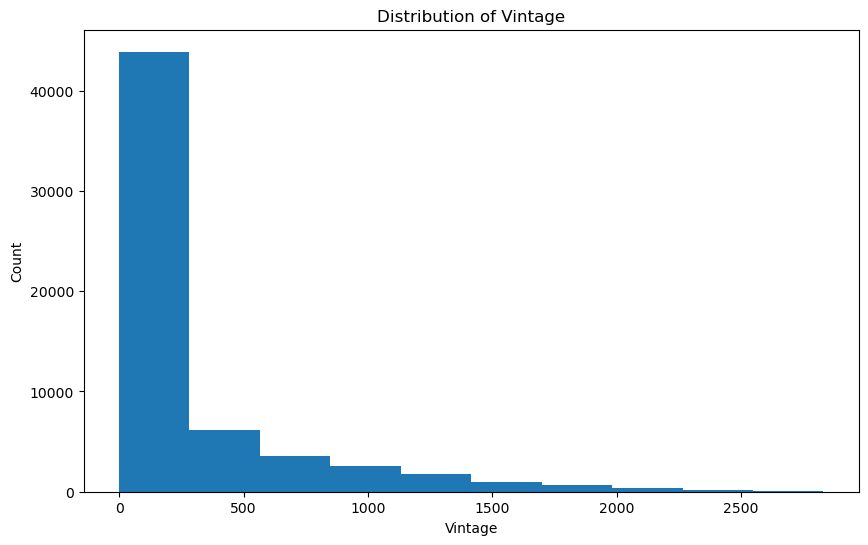

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(data['vintage'], bins=10)
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Distribution of Vintage')
plt.show()

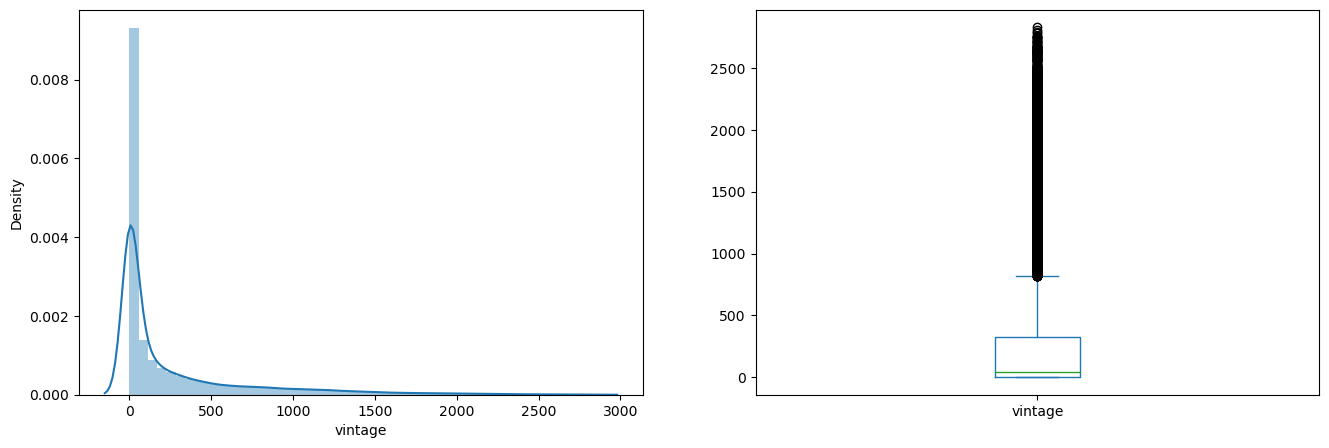

In [49]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['vintage'])
plt.subplot(122)
data['vintage'].plot.box(figsize=(16,5))
plt.show()

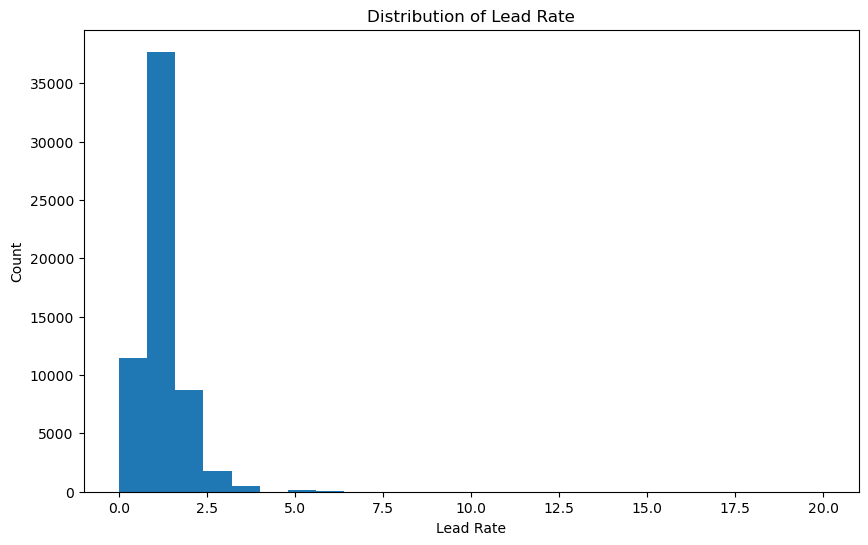

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(data['lead_rate'], bins=25)
plt.xlabel('Lead Rate')
plt.ylabel('Count')
plt.title('Distribution of Lead Rate')
plt.show()

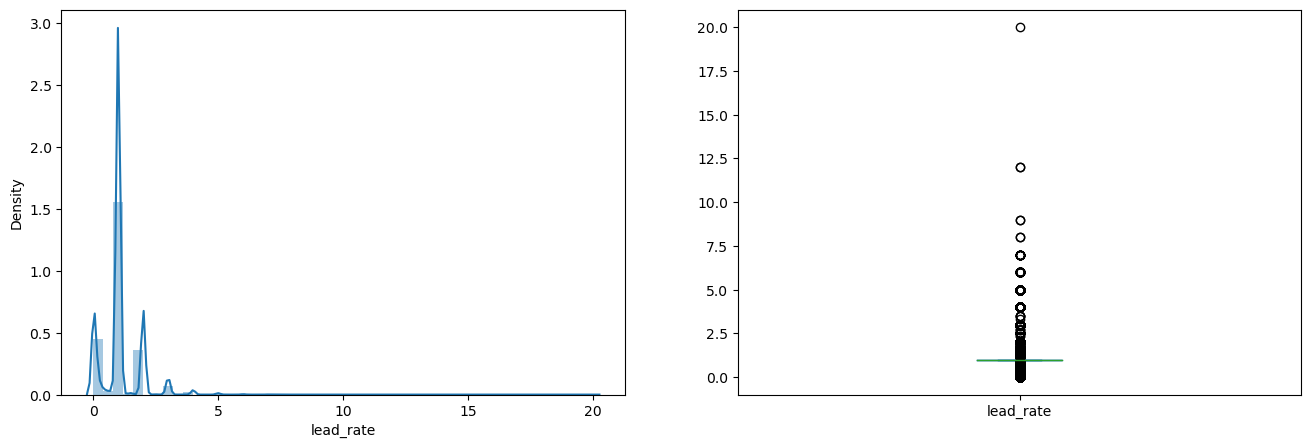

In [50]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['lead_rate'])
plt.subplot(122)
data['lead_rate'].plot.box(figsize=(16,5))
plt.show()

##### Inference



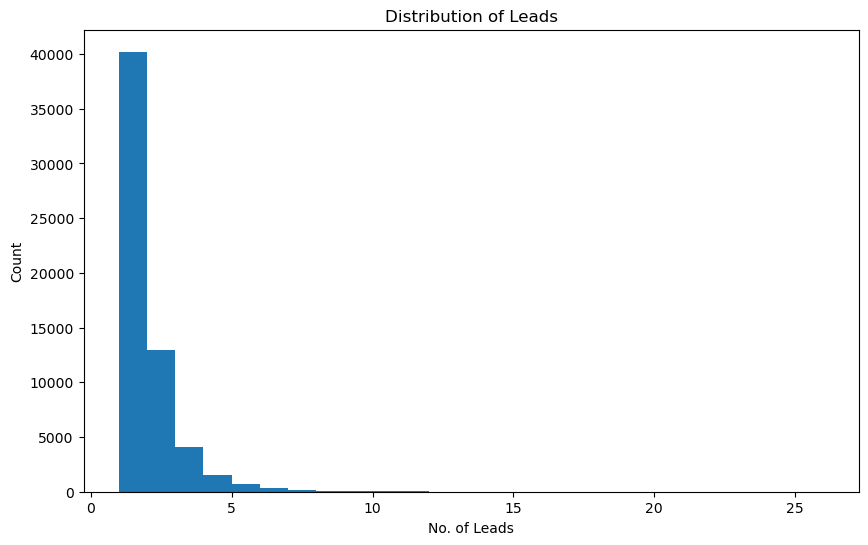

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(data['#leads'], bins=25)
plt.xlabel('No. of Leads')
plt.ylabel('Count')
plt.title('Distribution of Leads')
plt.show()

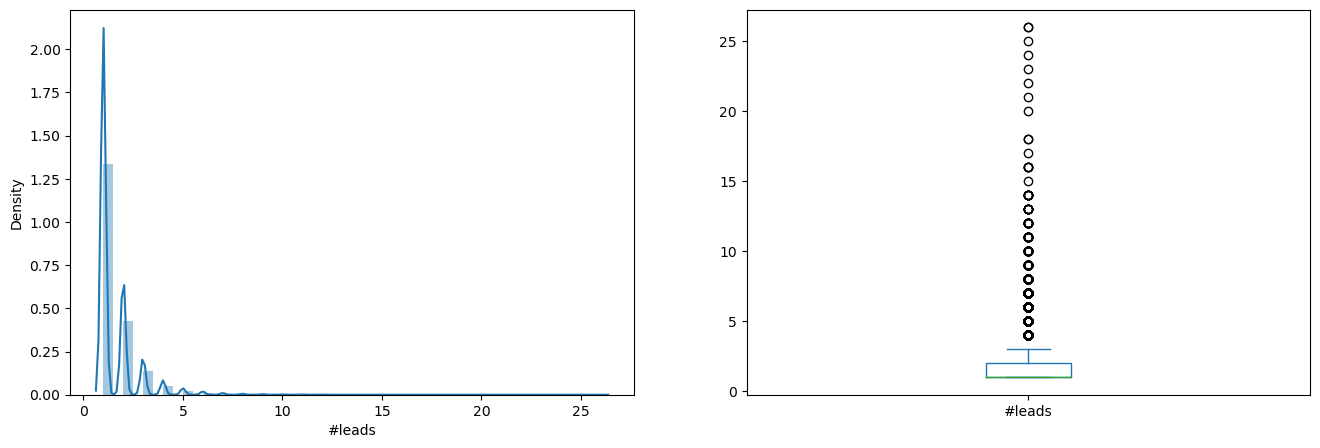

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['#leads'])
plt.subplot(122)
data['#leads'].plot.box(figsize=(16,5))
plt.show()

##### Inference


### 5.2 Bivariate Analysis

#### Categorical Independent Variable Vs Target Variable


In [54]:
Subdomain= pd.crosstab(data['subdomain'],data['buy'])
Subdomain

buy,0,1
subdomain,,
aol,73,0
combined,5237,42
fractal,165,0
gamil,98,0
gmail,48776,860
hotmail,1109,13
icloud,118,0
live,141,3
mail,104,0


In [56]:
Subdomain.div(Subdomain.sum(1).astype(float), axis=0)

buy,0,1
subdomain,,
aol,1.000000,0.000000
combined,0.992044,0.007956
fractal,1.000000,0.000000
gamil,1.000000,0.000000
gmail,0.982674,0.017326
hotmail,0.988414,0.011586
icloud,1.000000,0.000000
live,0.979167,0.020833
mail,1.000000,0.000000


<AxesSubplot:xlabel='subdomain'>

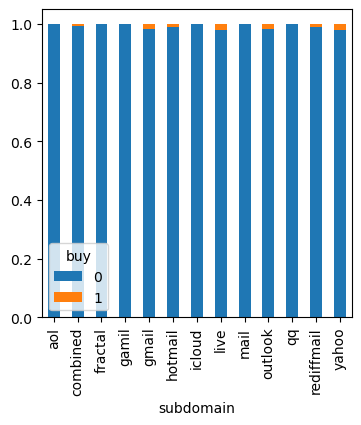

In [57]:
Subdomain.div(Subdomain.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, figsize=(4,4))

##### Inference 

<AxesSubplot:xlabel='utm_medium'>

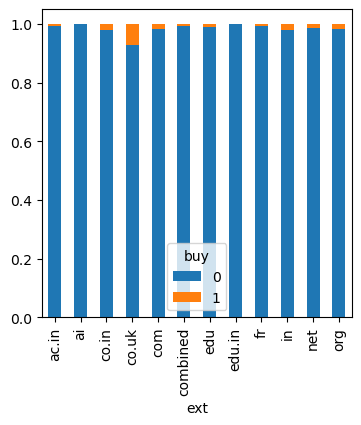

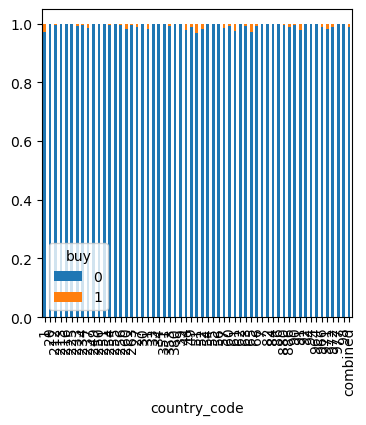

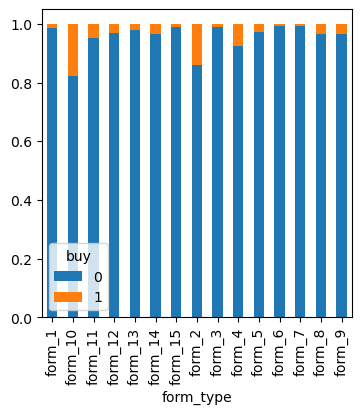

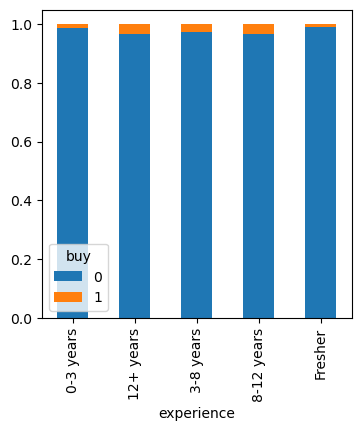

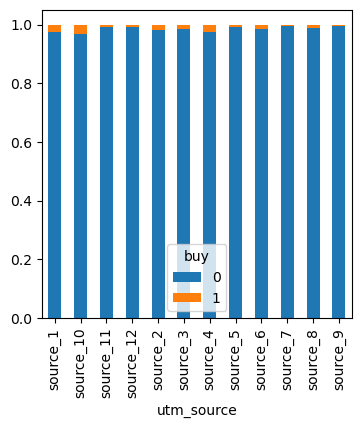

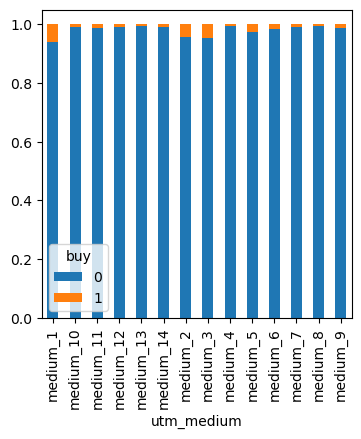

In [58]:
Ext = pd.crosstab(data['ext'],data['buy'])
Country_code = pd.crosstab(data['country_code'],data['buy'])
Form_Type = pd.crosstab(data['form_type'],data['buy'])
Experience = pd.crosstab(data['experience'],data['buy'])
Utm_source =pd.crosstab(data['utm_source'],data['buy'])
Utm_medium = pd.crosstab(data['utm_medium'],data['buy'])
SignUp =pd.crosstab(data['is_signedup'],data['buy'])

Ext.div(Ext.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Country_code.div(Country_code.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Form_Type.div(Form_Type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Experience.div(Experience.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Utm_source.div(Utm_source.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Utm_medium.div(Utm_medium.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

##### Inference

#### Numerical Independent Variable Vs Target Variable


<AxesSubplot:xlabel='buy'>

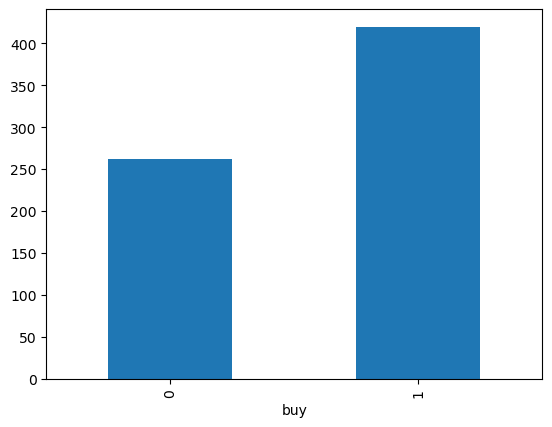

In [60]:
data.groupby('buy')['vintage'].mean().plot.bar()

##### Inference 

<AxesSubplot:xlabel='buy'>

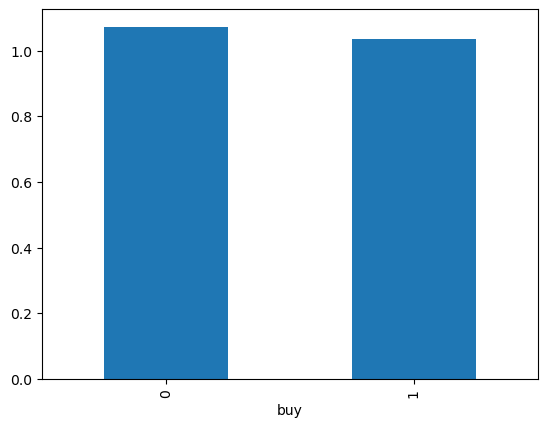

In [61]:
data.groupby('buy')['lead_rate'].mean().plot.bar()

<AxesSubplot:xlabel='buy'>

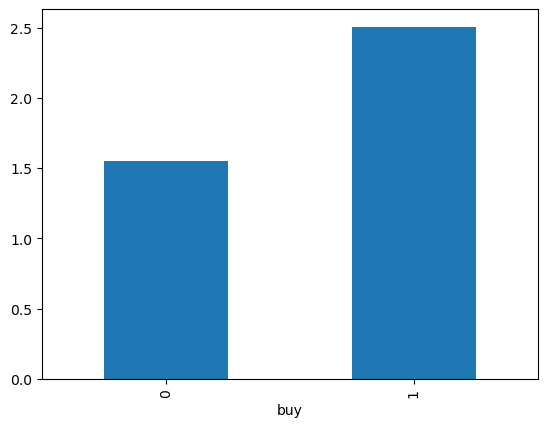

In [62]:
data.groupby('buy')['#leads'].mean().plot.bar()

##### Inference

<AxesSubplot:>

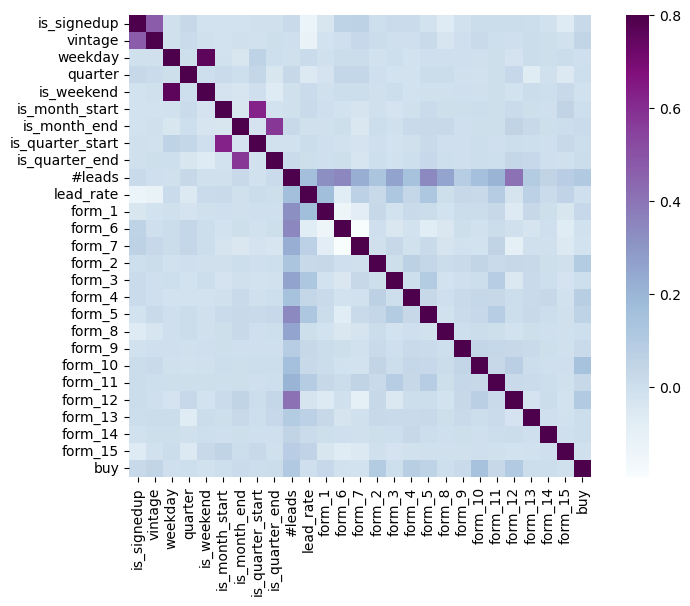

In [63]:
matrix=data.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

# Data Visulization

In [92]:
data['buy'].value_counts(normalize=True)

0    0.985731
1    0.014269
Name: buy, dtype: float64

<AxesSubplot:>

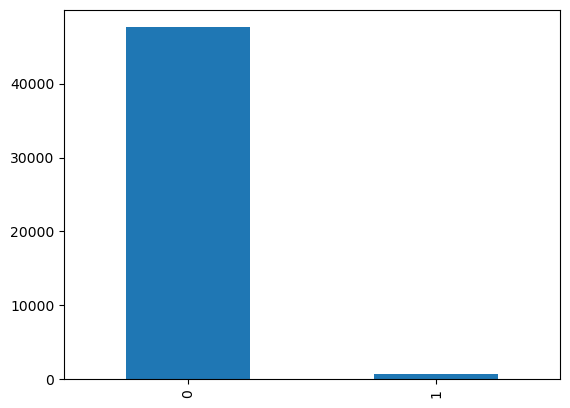

In [93]:
data['buy'].value_counts().plot.bar()

0    0.985731
1    0.014269
Name: buy, dtype: float64


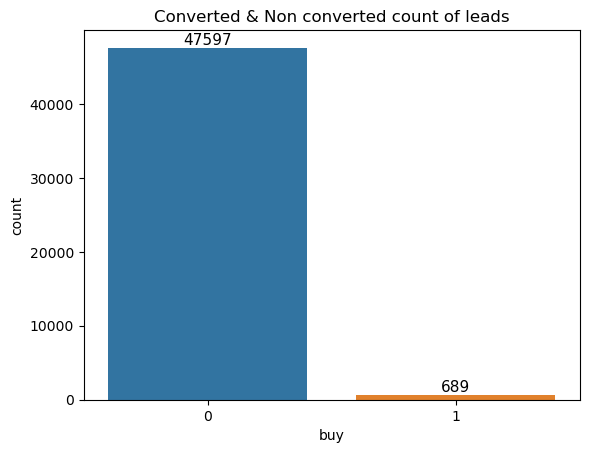

In [94]:
fig = sns.countplot(x=data['buy'])
plt.title('Converted & Non converted count of leads')

for bar in fig.patches:
    fig.annotate(f"{bar.get_height()}", (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

print(data['buy'].value_counts(normalize=True))

AttributeError: 'AxesSubplot' object has no attribute 'get_height'

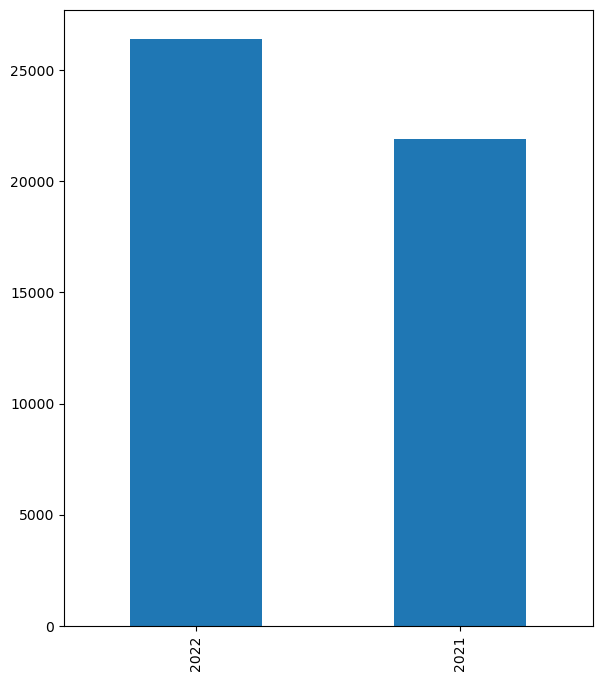

In [96]:
 # Checking total leads Year wise & relation of lead conversion with Years.

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig1 = data['Created_at_Year'].value_counts().plot(kind='bar')
for bar in fig1.patches:
    fig1.annotate(f"{fig1.get_height()}", (fig1.get_x() + fig1.get_width() / 2, fig1.get_height()),
                  ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Total leads - Year wise')
plt.xlabel('Years')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)

plt.subplot(1,2,2)
fig2 = sns.countplot(x='Created_at_Year',data=data,hue='buy')
for bar in fig2.patches:
    fig2.annotate(f"{fig2.get_height()}", (fig2.get_x() + fig2.get_width() / 2, fig2.get_height()),
                  ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Relation of lead conversion wrt Years')
plt.xlabel('Years')
plt.ylabel('Count of leads')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax1 = df_copy_new['Created_at_Year'].value_counts().plot(kind='bar')
for p in ax1.patches:
ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - Year wise')
plt.xlabel('Years')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax2 = sns.countplot(x='Created_at_Year',data=df_copy_new,hue='buy')
for p in ax2.patches:
ax2.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Relation of lead conversion wrt Years')
plt.xlabel('Years')
plt.ylabel('Count of leads')
plt.show()

In [ ]:
# Checking total leads Month wise & relation of lead conversion with Months.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax3 = df_copy_new['Created_at_Month'].value_counts().plot(kind='bar')
for p in ax3.patches:
ax3.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - Month wise')
plt.xlabel('Months')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax4 = sns.countplot(x='Created_at_Month',data=df_copy_new,hue='buy')
for p in ax4.patches:
ax4.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Relation of lead conversion wrt Months')
plt.xlabel('Months')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))


ax23 = sns.kdeplot(x='Created_at_Date',data=df_copy_new,hue='buy')
ax23 = sns.kdeplot(x='Created_at_Date',data=df_copy_new,hue='buy')

plt.title('Total leads conversion wrt Dates of a month')
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Checking total leads Quarter wise & relation of lead conversion with Quarters.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax5 = df_copy_new['quarter'].value_counts().plot(kind='bar')
for p in ax5.patches:
ax5.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - Quarter wise')
plt.xlabel('Quarters')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax6 = sns.countplot(x='quarter',data=df_copy_new,hue='buy')
for p in ax6.patches:
ax6.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Relation of lead conversion wrt Quarters')
plt.xlabel('Quarters')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax7 = df_copy_new['weekday'].value_counts().plot(kind='bar')
for p in ax7.patches:
ax7.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - Weekday wise')
plt.xlabel('Weekdays')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax8 = sns.countplot(x='weekday',data=df_copy_new,hue='buy')
for p in ax8.patches:
ax8.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Relation of lead conversion wrt Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# Checking total leads IS_WEEKEND wise & relation of lead conversion with IS_WEEKEND's.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax9 = df_copy_new['is_weekend'].value_counts().plot(kind='bar')
for p in ax9.patches:
ax9.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - IS_WEEKEND wise')
plt.xlabel("IS_WEEKEND's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax10 = sns.countplot(x='is_weekend',data=df_copy_new,hue='buy')
for p in ax10.patches:
ax10.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title("Relation of lead conversion wrt IS_WEEKEND's")
plt.xlabel("IS_WEEKEND's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
Checking total leads IS_SIGNEDUP wise & relation of lead conversion with IS_SIGNEDUP's.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax11 = df_copy_new['is_signedup'].value_counts().plot(kind='bar')
for p in ax11.patches:
ax11.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - IS_SIGNEDUP wise')
plt.xlabel("IS_SIGNEDUP's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax12 = sns.countplot(x='is_signedup',data=df_copy_new,hue='buy')
for p in ax12.patches:
ax12.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title("Relation of lead conversion wrt IS_SIGNEDUP's")
plt.xlabel("IS_SIGNEDUP's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# Checking total leads Experience wise & relation of lead conversion with Experience Level wise.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax13 = df_copy_new['experience'].value_counts().plot(kind='bar')
for p in ax13.patches:
ax13.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - Experience wise')
plt.xlabel('Experience Levels')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax14 = sns.countplot(x='experience',data=df_copy_new,hue='buy')
for p in ax14.patches:
ax14.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Relation of lead conversion wrt Experience Levels')
plt.xlabel('Experience Levels')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
Checking total leads UTM_SOURCE wise & relation of lead conversion with UTM_SOURCE's.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax15 = df_copy_new['utm_source'].value_counts().plot(kind='bar')
for p in ax15.patches:
ax15.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - UTM_SOURCE wise')
plt.xlabel("UTM_SOURCE's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax16 = sns.countplot(x='utm_source',data=df_copy_new,hue='buy')
for p in ax16.patches:
ax16.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title("Relation of lead conversion wrt UTM_SOURCE's")
plt.xlabel("UTM_SOURCE's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# Checking total leads UTM_MEDIUM wise & relation of lead conversion with UTM_MEDIUM's.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax17 = df_copy_new['utm_medium'].value_counts().plot(kind='bar')
for p in ax17.patches:
ax17.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - UTM_MEDIUM wise')
plt.xlabel("UTM_MEDIUM's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax18 = sns.countplot(x='utm_medium',data=df_copy_new,hue='buy')
for p in ax18.patches:
ax18.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title("Relation of lead conversion wrt UTM_MEDIUM's")
plt.xlabel("UTM_MEDIUM's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# Checking total leads Subdomain wise & relation of lead conversion with Subdomains.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax19 = df_copy_new['subdomain'].value_counts().plot(kind='bar')
for p in ax19.patches:
ax19.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - Subdomain wise')
plt.xlabel('Subdomains')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax20 = sns.countplot(x='subdomain',data=df_copy_new,hue='buy')
for p in ax20.patches:
ax20.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Relation of lead conversion wrt Subdomains')
plt.xlabel('Subdomains')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
ax20.legend(loc='upper right')
plt.show()

In [ ]:
# Checking total leads EXT wise & relation of lead conversion with EXT's.

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax21 = df_copy_new['ext'].value_counts().plot(kind='bar')
for p in ax21.patches:
ax21.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title('Total leads - EXT wise')
plt.xlabel("EXT's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
plt.subplot(1,2,2)
ax22 = sns.countplot(x='ext',data=df_copy_new,hue='buy')
for p in ax22.patches:
ax22.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
textcoords='offset points')
plt.title("Relation of lead conversion wrt EXT's")
plt.xlabel("EXT's")
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)
ax22.legend(loc='upper right')
plt.show()

In [ ]:
# Checking Converted & Non-converted leads wrt 'Lead_created_days_ago'

fig, axes = plt.subplots(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.hist(x = df_copy_new[df_copy_new['buy']==1]['Lead_created_days_ago'],
bins = 25,
rwidth = 0.80,
color = 'green')
plt.xlabel('Lead created days ago')
plt.ylabel('Count of Converted leads')
plt.title('Converted leads vs Lead created days ago')
plt.subplot(1, 2, 2)
plt.hist(x = df_copy_new[df_copy_new['buy']==0]['Lead_created_days_ago'],
bins = 25,
rwidth = 0.80,
color = 'red',)
plt.xlabel('Lead created days ago')
plt.ylabel('Count of Non-converted leads')
plt.title('Non-converted leads vs Lead created days ago')
plt.show()

In [ ]:
# Checking Converted & Non-converted leads wrt 'Lead_rate'

fig, axes = plt.subplots(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.hist(x = df_copy_new[df_copy_new['buy']==1]['lead_rate'],
bins = 'auto',
rwidth = 0.80,
color = 'green')
plt.xlabel('Lead rate')
plt.ylabel('Count of Converted leads')
plt.title('Converted leads vs Lead rate')
plt.subplot(1, 2, 2)
plt.hist(x = df_copy_new[df_copy_new['buy']==0]['lead_rate'],
bins = 'auto',
rwidth = 0.80,
color = 'red',)
plt.xlabel('Lead rate')
plt.ylabel('Count of Non-converted leads')
plt.title('Non-converted leads vs Lead rate')
plt.show()

In [ ]:
# Checking Converted & Non-converted leads wrt '#Leads'

fig, axes = plt.subplots(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.hist(x = df_copy_new[df_copy_new['buy']==1]['#leads'],
bins = 'auto',
rwidth = 0.80,
color = 'green')
plt.xlabel('#Leads')
plt.ylabel('Count of Converted leads')
plt.title('Converted leads vs #Leads')
plt.subplot(1, 2, 2)
plt.hist(x = df_copy_new[df_copy_new['buy']==0]['#leads'],
bins = 'auto',
rwidth = 0.80,
color = 'red',)
plt.xlabel('#Leads')
plt.ylabel('Count of Non-converted leads')
plt.title('Non-converted leads vs #Leads')
plt.show()

Conclusions / Insights :
1. We can clearly fetch that our target variable of the data is imbalanced which was quite understood from the problem statement as well. Also
can conclude that successful conversions of the lead will be lesser than that of non conversions.

2. We can notice that we got more leads year wise for the year 2022 compared to 2021, along with that unlike this out of those more leads got
converted in year 2021 and less in 2022.
3. We can notice that we got most leads month wise most for October month and least for November in the order shown in month wise plot
whereas order of conversions of leads is somewhat different to this order and can be seen in the plots above.
4. It's clearly visible to us that we got leads over all 31 days of a month but broadly less in first 15 days and more in later 15 days whereas
conversion rate is quite linear overall the dates of a month.
5. Similarly quarter wise, we got leads most 3rd then 2nd then 4th and least for 1st whereas rate of conversion of the recieved leads also
somewhat looks same just a slight difference that can be seen in the plots above.
6. We can see that we got leads weekday wise most for Wednesdays and least for Sundays and the order can be seen in the plots itself whereas
rate of conversion order is somewhat same but different than the lead order hence we can view it in the plot iteslf to observe closely.
7. When we observe weekend wise, we got more leads for Non weekends than weekends and similarly got more conversions for Non weekends
than weekends.

8. We can notice that is signed up wise we got more leads if the user is signed up than not signed up along with that more leads got converted
for is signed up only than not signed ups.
9. We can see eexperience wise we got most leads for Freshers, then 0-3 years experience, then 3-8 years, then 12+ years and 8-12 years least
whereas conversion rate of leads is found most for most experience and least for least experience which is freshers.
10. When we view utm_source wise, we got most leads source_6 wise and least for source_2 is a specific order and to view that along with
conversion rate order we need to view the plots closely as they dont posses any pattern to notice.
11. Similarly with utm_medium wise, most leads for medium_6 & least leads for medium_3 in a specific order and to view that along with
conversion rate order we need to view the plots closely as they dont posses any pattern to notice.
12. When we notice subdomain wise, we got the most leads for gmail and least for mail in a specific order and to view that along with conversion
rate order we need to view the plots closely as they dont posses any pattern to notice.
13. When we notice ext wise, we got the most leads for com and least for net in a specific order and to view that along with conversion rate order
we need to view the plots closely as they dont posses any pattern to notice.
14. We can notice for Converted & Non converted leads for Leads_created_days_ago we got most converted leads for 200-250 days & 450-
500 days whereas most non converted leads are for 120-400 days then for both rest of the areas the count falls comparitively.

Done with Data visualization. Moving ahead !

## Feature Encoding

In [97]:
data_ml =data.copy()

In [98]:
data_ml.drop(columns=['Created_at_Date','Created_at_Time'],inplace=True)

In [99]:
data_ml[['Created_at_Year','Created_at_Month','quarter','weekday']] = data_ml[['Created_at_Year','Created_at_Month','quarter','weekday']].astype('object')

In [100]:
bool_cols = data_ml.select_dtypes(include='bool').columns.tolist()

In [101]:
bool_cols

['is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_signedup']

In [103]:
data_ml[bool_cols] = data_ml[bool_cols].astype(int)

In [104]:
data_ml['country_code'].value_counts(normalize=True)

91     0.559044
1      0.100795
234    0.058381
92     0.027006
254    0.018763
44     0.017500
55     0.014518
251    0.011204
880    0.010956
27     0.010603
233    0.010189
20     0.010065
98     0.009879
62     0.009485
971    0.006689
61     0.006482
977    0.006089
90     0.006006
33     0.005612
84     0.005385
49     0.005364
212    0.005136
94     0.004722
263    0.004308
966    0.004287
52     0.004018
60     0.003604
65     0.003604
57     0.003376
213    0.003314
7      0.003106
86     0.003065
256    0.003044
255    0.003003
216    0.002817
34     0.002589
63     0.002423
54     0.002423
237    0.002320
66     0.002299
39     0.002009
225    0.001988
260    0.001967
353    0.001967
82     0.001926
51     0.001843
972    0.001657
30     0.001615
964    0.001595
56     0.001533
250    0.001512
380    0.001450
31     0.001408
351    0.001408
886    0.001408
249    0.001243
Name: country_code, dtype: float64

In [105]:
# Picking & viewing top 10 unique entries of 'country_code' feature for encoding and considering rest as others category

# as post top 10 all entries are less than 1% and the top 10 consitutes majorly in the feature.
data_ml['country_code'].value_counts().head(10).index

Int64Index([91, 1, 234, 92, 254, 44, 55, 251, 880, 27], dtype='int64')

In [106]:
country_code_ = [i for i in data['country_code'].value_counts().head(10).index]

In [107]:
for i in country_code_:
    data_ml[i]=np.where(data_ml['country_code']==i,1,0)

In [108]:
other_country_code = list(set(data_ml['country_code']) - set(country_code_))
# Setting the value of the new 'others' column to 1 for all other countries
data_ml['Other_country_codes'] = np.where(data_ml['country_code'].isin(other_country_code), 1, 0)

In [109]:
data_ml.drop(columns=['country_code'],inplace=True)

In [110]:
# Importing Label encoder for encoding of categorical features.

from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()

In [112]:
cat_cols_new = data_ml.select_dtypes(include='object')

In [113]:
for col in cat_cols_new:
    data_ml[col] = le.fit_transform(data_ml[col])

In [115]:
data_ml.head()

,Created_at_Year,Created_at_Month,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,experience,is_signedup,utm_source,utm_medium,subdomain,ext,Lead_created_days_ago,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,91,1,234,92,254,44,55,251,880,27,Other_country_codes
0,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,NaN,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,1,0,1,0,4,0,4,7,2,3,NaN,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,NaN,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,1,0,1,0,4,0,0,0,2,3,NaN,2,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,1,0,1,0,4,0,5,8,2,3,NaN,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [116]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Created_at_Year        48286 non-null  int32  
 1   Created_at_Month       48286 non-null  int32  
 2   quarter                48286 non-null  int32  
 3   weekday                48286 non-null  int32  
 4   is_weekend             48286 non-null  int64  
 5   is_month_start         48286 non-null  int32  
 6   is_month_end           48286 non-null  int32  
 7   is_quarter_start       48286 non-null  int32  
 8   is_quarter_end         48286 non-null  int32  
 9   experience             48286 non-null  int32  
 10  is_signedup            48286 non-null  int32  
 11  utm_source             48286 non-null  int32  
 12  utm_medium             48286 non-null  int32  
 13  subdomain              48286 non-null  int32  
 14  ext                    48286 non-null  int32  
 15  Le

## Feature Scaling

In [118]:
#Importing Standard Scaler & MinMaxScaler for scaling of numerical features

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler()

In [122]:
# Taking out three features manually from the df who should be scaled and are in int datatype as well

# due to the reason they are having distribution of data.

scaling_cols = ['Lead_created_days_ago','#leads','lead_rate']

In [123]:
# Scaling the numerical features under newly created variable

for col in scaling_cols:
    data_ml[col] = scaler.fit_transform(data_ml[[col]])

In [124]:
data_ml.head()

,Created_at_Year,Created_at_Month,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,experience,is_signedup,utm_source,utm_medium,subdomain,ext,Lead_created_days_ago,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,91,1,234,92,254,44,55,251,880,27,Other_country_codes
0,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,NaN,0.0,0.499621,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,1,0,1,0,4,0,4,7,2,3,NaN,0.0,0.499621,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,NaN,0.0,0.499621,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,1,0,1,0,4,0,0,0,2,3,NaN,0.5,1.000000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,1,0,1,0,4,0,5,8,2,3,NaN,0.0,0.499621,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [125]:
# Using train test split for further feature selection process & model building later too

# Taking independent features of the data as X & dependent feature as Y for train test split for further process

X = data_ml.drop('buy',axis=1)
y = data_ml['buy']

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
x_train.shape, y_train.shape

((36214, 44), (36214,))

<AxesSubplot:>

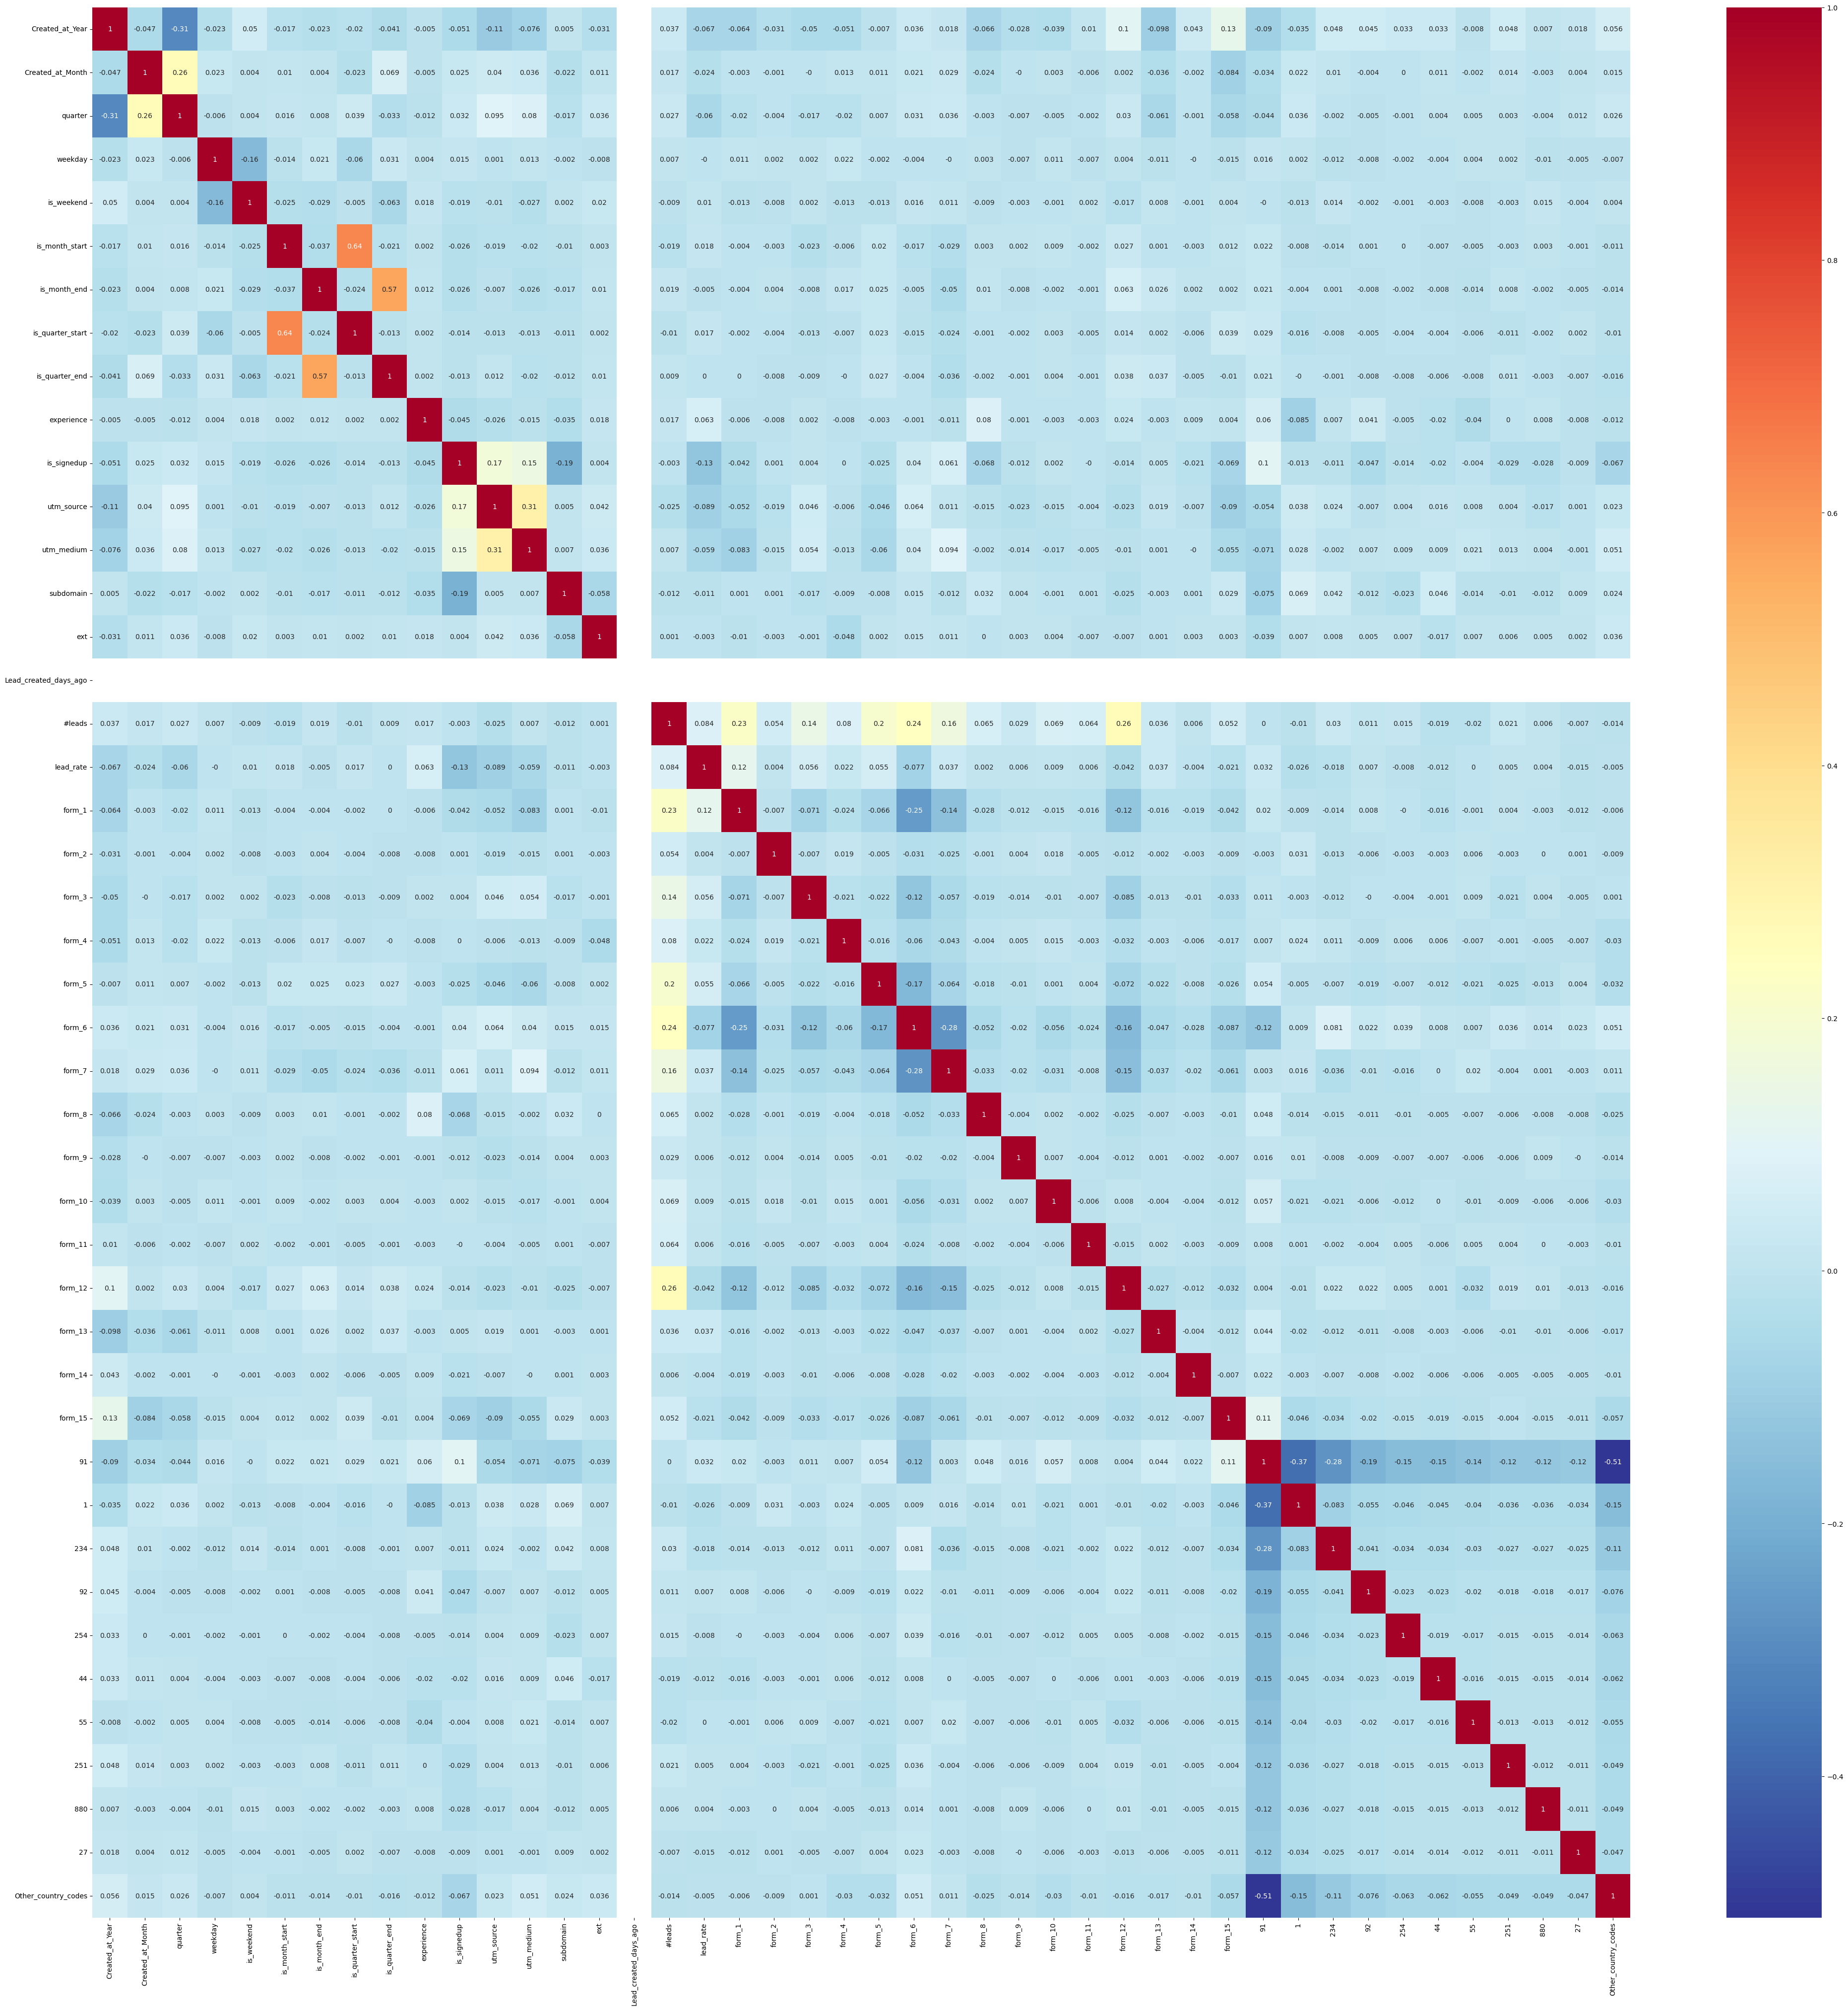

In [128]:
# Creating heatmap for checking collinearity / corelation factor between independent features

plt.figure(figsize=(50,50))
cor = x_train.corr().round(3)
sns.heatmap(cor, annot=True,cmap=plt.cm.RdYlBu_r)

In [130]:
# Creating / Defining a new function to fetch features of the dataframe which have collinearity scores
# above the threshold we want for our model as to remove those features of the data due to high collinearity
# of those features with other independent features which can create problems with their
# existence in data for model building & predicting.


def correlation (dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [131]:
# Applying the above created / defined function to our dataset & setting threshold as 0.6 for safer side

# to fetch features having collinearity score more than threshold to be removed in further steps.

corr_features = correlation(x_train,0.6)

# Just for idea & showing took length of the fetched features.

len(corr_features)

1

In [132]:
corr_features

{'is_quarter_start'}

In [133]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [134]:
x_train.shape

(36214, 43)

In [135]:
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [136]:
x_train.head()

,Created_at_Year,Created_at_Month,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_end,experience,is_signedup,utm_source,utm_medium,subdomain,ext,Lead_created_days_ago,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,91,1,234,92,254,44,55,251,880,27,Other_country_codes
0,1,8,1,3,1,0,0,0,0,1,6,9,2,3,NaN,1.0,0.082638,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,5,2,0,0,1,0,0,2,0,2,5,2,3,NaN,0.0,0.499621,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,6,1,0,0,0,0,0,2,1,7,1,2,3,NaN,0.5,1.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,3,0,1,0,0,0,0,4,0,7,11,2,3,NaN,0.0,0.499621,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,6,1,5,0,0,0,0,4,1,6,9,2,3,NaN,0.5,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Model Building

In [137]:
# Importing required ML algorithm to be used as per problem statement

from sklearn.linear_model import LogisticRegression

In [138]:
lr = LogisticRegression()

In [139]:
# Fitting train data using algoritm

lr_model = lr.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [140]:
lr.score(x_train,y_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

##### Inference

## 6. Missing Value and Outlier Treatment

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Exploration and Preprocessing
# Load the dataset
data = pd.read_csv('data.csv')

# Handle missing values and outliers

# Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding)

# Split the dataset into training and testing sets
X = data.drop('buy', axis=1)  # Features
y = data['buy']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Engineering (if required)
# Extract insights from existing features

# Engineer new features if necessary

# Scale or normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Additional steps as per your specific requirements


ValueError: could not convert string to float: '2021-08-28 11:30:53'

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('data.csv')

# Drop any columns that are not required for the analysis
data = data.drop(columns=['created_at', 'subdomain', 'ext'])

# Convert boolean columns to integers (True=1, False=0)
boolean_cols = ['is_signedup', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']
data[boolean_cols] = data[boolean_cols].astype(int)

# Encode categorical columns using LabelEncoder
categorical_cols = ['country_code', 'form_type', 'experience', 'utm_source', 'utm_medium']
label_encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

# Perform feature scaling or normalization if required
# You can use techniques like StandardScaler or MinMaxScaler from sklearn.preprocessing

# Split the dataset into features and target variable
X = data.drop('buy', axis=1)  # Features
y = data['buy']  # Target variable

# Additional preprocessing steps as per your specific requirements

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling or normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9832490256240153
Precision: 0.3076923076923077
Recall: 0.02030456852791878
F1-score: 0.03809523809523809
